In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

%matplotlib inline

In [11]:
arc = '../data/compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [16]:
y = df['salario']
X = df.drop(['salario', 'noasiat','postgrad'], axis=1)

In [18]:
reg_lin = sm.OLS(y, sm.add_constant(X)).fit()

In [19]:
print(reg_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           7.37e-38
Time:                        19:12:43   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.2

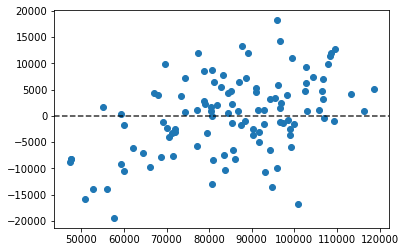

In [22]:
fig, ax = plt.subplots()
y_pred = reg_lin.predict(sm.add_constant(X))
ax.scatter(y, y - y_pred)
plt.axhline(y=0, color='black', alpha=0.8, linestyle='--')